<a href="https://colab.research.google.com/github/Param-Bhatt/Stock-prediction-ML/blob/apple/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This program uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock of a corporation using past 60 day stock price

In [0]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
# Get the stock data
df = web.DataReader('AAPL',data_source='yahoo', start='2010-01-01',end='2020-04-10')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993


In [0]:
df.shape

(2585, 6)

Text(0, 0.5, 'Close Price USD $')

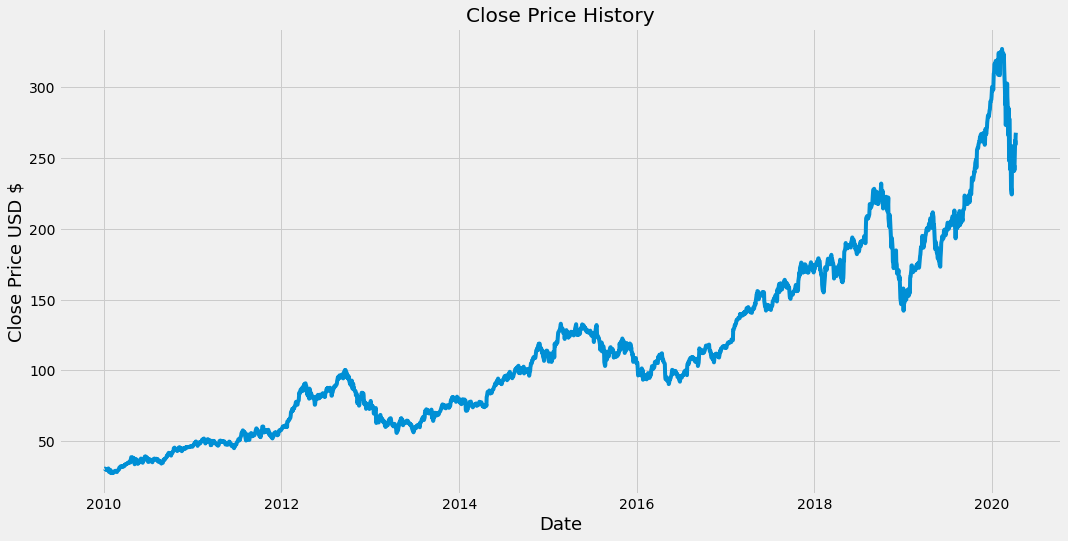

In [0]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close']  )
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)

In [0]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2068

In [0]:
#Scale the data (Preprocessing)
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(dataset)
scaled_data 

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.77392231],
       [0.7960731 ],
       [0.80247807]])

In [0]:
#Create the training data set 
#Create the Scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the dataset into xtrain and ytrain
x_train = []
y_train = []
for i in range(180, len(train_data)):
  x_train.append(train_data[i-180:i, 0])
  y_train.append(train_data[i, 0]) 

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.01046536, 0.01064169, 0.0090166 , ..., 0.04027926, 0.03970738,
        0.04345319],
       [0.01064169, 0.0090166 , 0.00883075, ..., 0.03970738, 0.04345319,
        0.04371053],
       [0.0090166 , 0.00883075, 0.00949794, ..., 0.04345319, 0.04371053,
        0.04560726],
       ...,
       [0.3877856 , 0.38891986, 0.38718515, ..., 0.5037434 , 0.50444393,
        0.50234231],
       [0.38891986, 0.38718515, 0.38915335, ..., 0.50444393, 0.50234231,
        0.49326851],
       [0.38718515, 0.38915335, 0.38461645, ..., 0.50234231, 0.49326851,
        0.49306836]])

In [0]:
#reshape the xtrain dataset to 3D as LSTM model takes input as a form of [number of samples, number of times steps, number of features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1888, 180, 1)

In [0]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, verbose=1)

Epoch 1/5
1888/1888 [==============================] - 193s 102ms/step - loss: 5.4826e-04
Epoch 2/5
1888/1888 [==============================] - 192s 102ms/step - loss: 1.8542e-04
Epoch 3/5
1888/1888 [==============================] - 191s 101ms/step - loss: 1.4487e-04
Epoch 4/5
1888/1888 [==============================] - 190s 101ms/step - loss: 1.0675e-04
Epoch 5/5
1888/1888 [==============================] - 190s 100ms/step - loss: 1.0686e-04


In [0]:
#Create the testing dataset 
#Create the new array containing the scaled values from index 3620 to 
test_data = scaled_data[training_data_len - 180: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(180, len(test_data)):
  x_test.append(test_data[i-180 : i, 0])

In [0]:
#Convert the data into the numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(517, 180, 1)

In [0]:
#Get the models to predict values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [0]:
#Get the RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

5.757322972427535

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


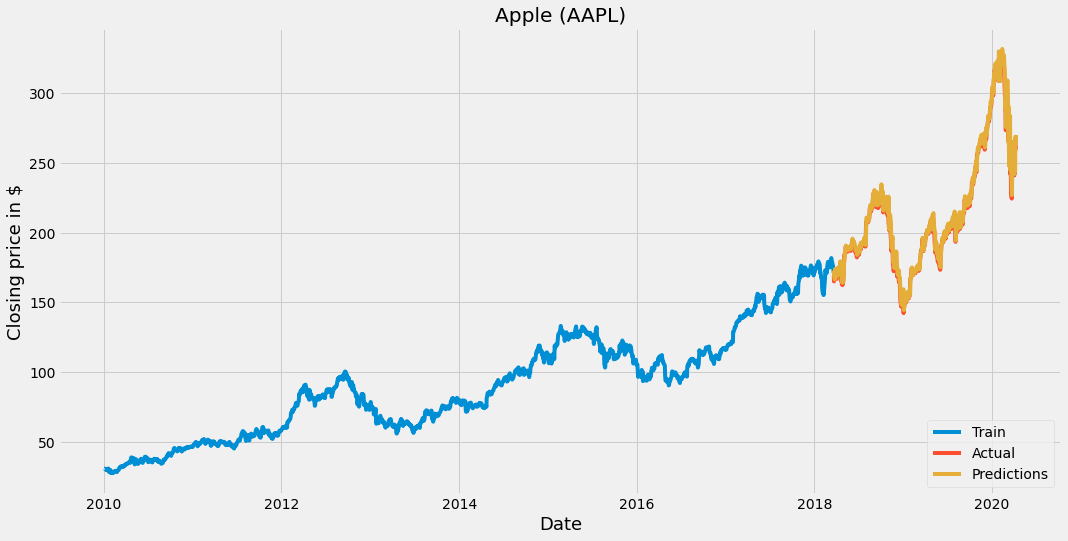

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Apple (AAPL)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted value
valid[400:450]

,Close,Predictions
Date,,
2019-10-23,243.179993,242.626907
2019-10-24,243.580002,245.724579
2019-10-25,246.580002,246.073853
2019-10-28,249.050003,249.103119
2019-10-29,243.289993,251.753616
2019-10-30,243.259995,244.982697
2019-10-31,248.759995,244.640213
2019-11-01,255.820007,251.440918
2019-11-04,257.500000,259.803558


In [0]:
#Check the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17' )
#Create new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days of closing  price values and convert the dataframe to an array
last_60_days = new_df[-180 : ].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[283.69202]]


In [0]:
#Get the actual value
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18' )
apple_quote['Close']

Date
2019-12-18    279.73999
Name: Close, dtype: float64